In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import string
from nltk.classify import NaiveBayesClassifier

In [2]:
ds=pd.read_csv("mbti_1.csv")
ds.tail()

,type,posts
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...
8674,INFP,'It has been too long since I have been on per...


In [3]:
ds.shape # counting no. of rows, columns in dataset

(8675, 2)

In [4]:
ds.isnull().any() #checking for null values in dataset

type     False
posts    False
dtype: bool

In [5]:
ds.iloc[0,1].split('|||') #iloc:selecting rows ,[0,1]:selecting 0th row i.e first row and 1st i.e 2nd column from dataset

["'http://www.youtube.com/watch?v=qsXHcwe3krw",
 'http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg',
 'enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks',
 'What has been the most life-changing experience in your life?',
 'http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.',
 'May the PerC Experience immerse you.',
 'The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206',
 "Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...",
 '84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-ho

In [6]:
len(ds.iloc[1,1].split('|||')) #counts no. of post in 2nd row -2nd column ie post column

50

In [7]:
len(ds.iloc[2,1].split('|||'))#counts no. of post in 3rdd row -2nd column ie post column

50

In [8]:
len(ds.iloc[0,1].split('|||'))#counts no. of post in 1st row -2nd column ie post column

50

In [9]:
len(ds.iloc[1444,1].split('|||'))#counts no. of post in 1445th row -2nd column ie post column

50

In [10]:
#From above,we see that each row has 50 posts 
types=np.unique(np.array(ds['type'])) #displays the unique sorted rows in type column and put it in array
types

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

In [11]:
ds['type']

0       INFJ
1       ENTP
2       INTP
3       INTJ
4       ENTJ
        ... 
8670    ISFP
8671    ENFP
8672    INTP
8673    INFP
8674    INFP
Name: type, Length: 8675, dtype: object

In [12]:
np.array(ds['type'])

array(['INFJ', 'ENTP', 'INTP', ..., 'INTP', 'INFP', 'INFP'], dtype=object)

In [13]:
#counting total posts of each type
total=ds.groupby(['type']).count()*50
total

,posts
type,
ENFJ,9500
ENFP,33750
ENTJ,11550
ENTP,34250
ESFJ,2100
ESFP,2400
ESTJ,1950
ESTP,4450
INFJ,73500


In [14]:
allPost=pd.DataFrame() #put array into 2D data
for j in types:
    temp1 = ds[ds['type']==j]['posts'] #making type as columns 
    temp2=[]
    for i in temp1:
        temp2+=i.split('|||')
    temp3=pd.Series(temp2)  #each row is filled in order : creating 1d array i.e data is filled row wise in allPost
    allPost[j]=temp3 

In [15]:
allPost.to_csv('mbtiPost.csv',index=False)

In [16]:
allPost.head()

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
0,'https://www.youtube.com/watch?v=PLAaiKvHvZs,"'He doesn't want to go on the trip without me,...",'You're fired.,'I'm finding the lack of me in these posts ver...,'Why not?,'Edit: I forgot what board this was on.,this is such a catch 22,Splinter Cell Blacklist for Xbox 360.,'http://www.youtube.com/watch?v=qsXHcwe3krw,'I think we do agree. I personally don't consi...,"'Dear INTP, I enjoyed our conversation the o...",'Good one _____ https://www.youtube.com/wat...,'I love feeling affectionate for the one I lov...,'They paint without numbers,'Newton's Universal Gravity Law. I mean seriou...,'I got 593. From what I've read about the Enn...
1,51 :o,I'm still completely in AWE and I'm AMAZED tha...,That's another silly misconception. That appro...,Sex can be boring if it's in the same position...,Any other ESFJs originally mistype as an NFP? ...,I am currently reading 'Artemis Fowl: The Eter...,"I'm here! Although, I'm quite the terrible EST...",ESTPs are generally well liked. If you get hat...,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...,Literature... I'd suggest 'Everyday Zen' by Ch...,"Dear ENTJ sub, Long time no see. Sincerely,...","Of course, to which I say I know; that's my bl...",Kind of an update on my past post above. Whate...,I'd guess at istp too,"Well, if money and time was no object, I would...",GTFO FEELER!
2,I went through a break up some months ago. We ...,"Thanks, everyone. I'm struggling with being se...",But guys... he REALLY wants to go on a super-d...,Giving new meaning to 'Game' theory.,Hello again. Thanks for all your help. I know ...,"Hi all, if you've got some spare time and why ...",Yikes. I do not want power...,I often come off to people with the opposite o...,enfp and intj moments https://www.youtube.com...,Being emotional doesn't automatically make som...,None of them. All other types hurt in deep exi...,Does being absolutely positive that you and yo...,It feels weird being in love for the first tim...,"My best bud is ESFP, very funny, entertaining ...",http://www.oglaf.com/media/comic/failsafe.jpg,A lot of the stuff that you read in the INTP d...
3,ENFJ Puns so many puns.,My husband works an extra job each year to pay...,Never mind. Just go on permanent vacation.,Hello *ENTP Grin* That's all it takes. Than w...,"Of the J functions, I'd say it would be: Fi>Ti...",BABYMETAL are the best band of this decade ht...,Thank you SO SO much. This is what I had plann...,Ask her what you are to her.,What has been the most life-changing experienc...,"I'm a Ch'an Buddhist, so it's a daily thing fo...",Probably a sliding scale that depends on indiv...,"No, I didn't; thank you for a link!",Unsure if i completely understand the question...,"I used to smoke weed alot, everyday from morni...",I'm still laughing! xD http://www.youtube.com...,Don't worry about it. You are trying to make ...
4,Well I personally don't go that much for attra...,He said that it's not like he's asking me to d...,Two months? I wouldn't be crazy about the idea...,This + Lack of Balance and Hand Eye Coordination.,The ESFJs on this site are lovely. I'm general...,Banned for being a fire hazard.,Hi,I'm a euphonium player and a writer,http://www.youtube.com/watch?v=vXZeYwwRDw8 h...,"Glad to know I'm not the only one. I meditate,...",Draco Malfoy also. I'd say he's either 358 or ...,So-called Ti-Si loop (and it can stem from any...,"Not often, but I tend to lose it more when it ...",Jimi Hendrix - The Wind Cries Mary. After all...,"workaround is working for me, and I'm using FF...",My mother-in-law is an ESTJ. She is the epito...


In [17]:
allPost.shape #display no. of rows,column in dataset

(9288, 16)

In [18]:
allPost.shape[0] #no. of rows

9288

In [19]:
allPost.shape[1] #no. of column

16

In [20]:
totalElements=allPost.shape[0]*allPost.shape[1]
totalElements

148608

In [21]:
totalElements=np.size(allPost) #same work as above
totalElements

148608

In [22]:
allPosts=pd.read_csv('mbtiPost.csv')
allPosts.head()

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
0,'https://www.youtube.com/watch?v=PLAaiKvHvZs,"'He doesn't want to go on the trip without me,...",'You're fired.,'I'm finding the lack of me in these posts ver...,'Why not?,'Edit: I forgot what board this was on.,this is such a catch 22,Splinter Cell Blacklist for Xbox 360.,'http://www.youtube.com/watch?v=qsXHcwe3krw,'I think we do agree. I personally don't consi...,"'Dear INTP, I enjoyed our conversation the o...",'Good one _____ https://www.youtube.com/wat...,'I love feeling affectionate for the one I lov...,'They paint without numbers,'Newton's Universal Gravity Law. I mean seriou...,'I got 593. From what I've read about the Enn...
1,51 :o,I'm still completely in AWE and I'm AMAZED tha...,That's another silly misconception. That appro...,Sex can be boring if it's in the same position...,Any other ESFJs originally mistype as an NFP? ...,I am currently reading 'Artemis Fowl: The Eter...,"I'm here! Although, I'm quite the terrible EST...",ESTPs are generally well liked. If you get hat...,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...,Literature... I'd suggest 'Everyday Zen' by Ch...,"Dear ENTJ sub, Long time no see. Sincerely,...","Of course, to which I say I know; that's my bl...",Kind of an update on my past post above. Whate...,I'd guess at istp too,"Well, if money and time was no object, I would...",GTFO FEELER!
2,I went through a break up some months ago. We ...,"Thanks, everyone. I'm struggling with being se...",But guys... he REALLY wants to go on a super-d...,Giving new meaning to 'Game' theory.,Hello again. Thanks for all your help. I know ...,"Hi all, if you've got some spare time and why ...",Yikes. I do not want power...,I often come off to people with the opposite o...,enfp and intj moments https://www.youtube.com...,Being emotional doesn't automatically make som...,None of them. All other types hurt in deep exi...,Does being absolutely positive that you and yo...,It feels weird being in love for the first tim...,"My best bud is ESFP, very funny, entertaining ...",http://www.oglaf.com/media/comic/failsafe.jpg,A lot of the stuff that you read in the INTP d...
3,ENFJ Puns so many puns.,My husband works an extra job each year to pay...,Never mind. Just go on permanent vacation.,Hello *ENTP Grin* That's all it takes. Than w...,"Of the J functions, I'd say it would be: Fi>Ti...",BABYMETAL are the best band of this decade ht...,Thank you SO SO much. This is what I had plann...,Ask her what you are to her.,What has been the most life-changing experienc...,"I'm a Ch'an Buddhist, so it's a daily thing fo...",Probably a sliding scale that depends on indiv...,"No, I didn't; thank you for a link!",Unsure if i completely understand the question...,"I used to smoke weed alot, everyday from morni...",I'm still laughing! xD http://www.youtube.com...,Don't worry about it. You are trying to make ...
4,Well I personally don't go that much for attra...,He said that it's not like he's asking me to d...,Two months? I wouldn't be crazy about the idea...,This + Lack of Balance and Hand Eye Coordination.,The ESFJs on this site are lovely. I'm general...,Banned for being a fire hazard.,Hi,I'm a euphonium player and a writer,http://www.youtube.com/watch?v=vXZeYwwRDw8 h...,"Glad to know I'm not the only one. I meditate,...",Draco Malfoy also. I'd say he's either 358 or ...,So-called Ti-Si loop (and it can stem from any...,"Not often, but I tend to lose it more when it ...",Jimi Hendrix - The Wind Cries Mary. After all...,"workaround is working for me, and I'm using FF...",My mother-in-law is an ESTJ. She is the epito...


In [23]:
allPosts.isnull().any()

ENFJ    True
ENFP    True
ENTJ    True
ENTP    True
ESFJ    True
ESFP    True
ESTJ    True
ESTP    True
INFJ    True
INFP    True
INTJ    True
INTP    True
ISFJ    True
ISFP    True
ISTJ    True
ISTP    True
dtype: bool

In [24]:
allPost_withoutnull = allPosts.fillna('-') #dropna was dropping all the rows with any column as null making it to 245 rows
allPost_withoutnull.isnull().any()

ENFJ    False
ENFP    False
ENTJ    False
ENTP    False
ESFJ    False
ESFP    False
ESTJ    False
ESTP    False
INFJ    False
INFP    False
INTJ    False
INTP    False
ISFJ    False
ISFP    False
ISTJ    False
ISTP    False
dtype: bool

In [25]:
allPost_withoutnull.shape

(9288, 16)

In [26]:
allPost_withoutnull.to_csv('mbtiPost_withoutnull.csv',index=False)

In [27]:
for j in types:
    allPost_withoutnull[j]=allPost_withoutnull[j].str.replace('https?://(i\.)?(www\.)?(\w+)(\.\w+)(\/)(\w+)(\S+)','-',case=False)
    #replacing the urls by '-'
allPost_withoutnull.head() 

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
0,'-,"'He doesn't want to go on the trip without me,...",'You're fired.,'I'm finding the lack of me in these posts ver...,'Why not?,'Edit: I forgot what board this was on.,this is such a catch 22,Splinter Cell Blacklist for Xbox 360.,'-,'I think we do agree. I personally don't consi...,"'Dear INTP, I enjoyed our conversation the o...",'Good one _____ -,'I love feeling affectionate for the one I lov...,'They paint without numbers,'Newton's Universal Gravity Law. I mean seriou...,'I got 593. From what I've read about the Enn...
1,51 :o,I'm still completely in AWE and I'm AMAZED tha...,That's another silly misconception. That appro...,Sex can be boring if it's in the same position...,Any other ESFJs originally mistype as an NFP? ...,I am currently reading 'Artemis Fowl: The Eter...,"I'm here! Although, I'm quite the terrible EST...",ESTPs are generally well liked. If you get hat...,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...,Literature... I'd suggest 'Everyday Zen' by Ch...,"Dear ENTJ sub, Long time no see. Sincerely,...","Of course, to which I say I know; that's my bl...",Kind of an update on my past post above. Whate...,I'd guess at istp too,"Well, if money and time was no object, I would...",GTFO FEELER!
2,I went through a break up some months ago. We ...,"Thanks, everyone. I'm struggling with being se...",But guys... he REALLY wants to go on a super-d...,Giving new meaning to 'Game' theory.,Hello again. Thanks for all your help. I know ...,"Hi all, if you've got some spare time and why ...",Yikes. I do not want power...,I often come off to people with the opposite o...,enfp and intj moments - sportscenter not top...,Being emotional doesn't automatically make som...,None of them. All other types hurt in deep exi...,Does being absolutely positive that you and yo...,It feels weird being in love for the first tim...,"My best bud is ESFP, very funny, entertaining ...",-,A lot of the stuff that you read in the INTP d...
3,ENFJ Puns so many puns.,My husband works an extra job each year to pay...,Never mind. Just go on permanent vacation.,Hello *ENTP Grin* That's all it takes. Than w...,"Of the J functions, I'd say it would be: Fi>Ti...",BABYMETAL are the best band of this decade -,Thank you SO SO much. This is what I had plann...,Ask her what you are to her.,What has been the most life-changing experienc...,"I'm a Ch'an Buddhist, so it's a daily thing fo...",Probably a sliding scale that depends on indiv...,"No, I didn't; thank you for a link!",Unsure if i completely understand the question...,"I used to smoke weed alot, everyday from morni...",I'm still laughing! xD - -,Don't worry about it. You are trying to make ...
4,Well I personally don't go that much for attra...,He said that it's not like he's asking me to d...,Two months? I wouldn't be crazy about the idea...,This + Lack of Balance and Hand Eye Coordination.,The ESFJs on this site are lovely. I'm general...,Banned for being a fire hazard.,Hi,I'm a euphonium player and a writer,- - On repeat for most of today.,"Glad to know I'm not the only one. I meditate,...",Draco Malfoy also. I'd say he's either 358 or ...,So-called Ti-Si loop (and it can stem from any...,"Not often, but I tend to lose it more when it ...",Jimi Hendrix - The Wind Cries Mary. After all...,"workaround is working for me, and I'm using FF...",My mother-in-law is an ESTJ. She is the epito...


In [28]:
for j in types:
   allPost_withoutnull[j]=allPost_withoutnull[j].str.replace('https?://(\w+\.)?(\S+.)','-',case=False)
allPost_withoutnull.head()  

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
0,'-,"'He doesn't want to go on the trip without me,...",'You're fired.,'I'm finding the lack of me in these posts ver...,'Why not?,'Edit: I forgot what board this was on.,this is such a catch 22,Splinter Cell Blacklist for Xbox 360.,'-,'I think we do agree. I personally don't consi...,"'Dear INTP, I enjoyed our conversation the o...",'Good one _____ -,'I love feeling affectionate for the one I lov...,'They paint without numbers,'Newton's Universal Gravity Law. I mean seriou...,'I got 593. From what I've read about the Enn...
1,51 :o,I'm still completely in AWE and I'm AMAZED tha...,That's another silly misconception. That appro...,Sex can be boring if it's in the same position...,Any other ESFJs originally mistype as an NFP? ...,I am currently reading 'Artemis Fowl: The Eter...,"I'm here! Although, I'm quite the terrible EST...",ESTPs are generally well liked. If you get hat...,-,Literature... I'd suggest 'Everyday Zen' by Ch...,"Dear ENTJ sub, Long time no see. Sincerely,...","Of course, to which I say I know; that's my bl...",Kind of an update on my past post above. Whate...,I'd guess at istp too,"Well, if money and time was no object, I would...",GTFO FEELER!
2,I went through a break up some months ago. We ...,"Thanks, everyone. I'm struggling with being se...",But guys... he REALLY wants to go on a super-d...,Giving new meaning to 'Game' theory.,Hello again. Thanks for all your help. I know ...,"Hi all, if you've got some spare time and why ...",Yikes. I do not want power...,I often come off to people with the opposite o...,enfp and intj moments - sportscenter not top...,Being emotional doesn't automatically make som...,None of them. All other types hurt in deep exi...,Does being absolutely positive that you and yo...,It feels weird being in love for the first tim...,"My best bud is ESFP, very funny, entertaining ...",-,A lot of the stuff that you read in the INTP d...
3,ENFJ Puns so many puns.,My husband works an extra job each year to pay...,Never mind. Just go on permanent vacation.,Hello *ENTP Grin* That's all it takes. Than w...,"Of the J functions, I'd say it would be: Fi>Ti...",BABYMETAL are the best band of this decade -,Thank you SO SO much. This is what I had plann...,Ask her what you are to her.,What has been the most life-changing experienc...,"I'm a Ch'an Buddhist, so it's a daily thing fo...",Probably a sliding scale that depends on indiv...,"No, I didn't; thank you for a link!",Unsure if i completely understand the question...,"I used to smoke weed alot, everyday from morni...",I'm still laughing! xD - -,Don't worry about it. You are trying to make ...
4,Well I personally don't go that much for attra...,He said that it's not like he's asking me to d...,Two months? I wouldn't be crazy about the idea...,This + Lack of Balance and Hand Eye Coordination.,The ESFJs on this site are lovely. I'm general...,Banned for being a fire hazard.,Hi,I'm a euphonium player and a writer,- - On repeat for most of today.,"Glad to know I'm not the only one. I meditate,...",Draco Malfoy also. I'd say he's either 358 or ...,So-called Ti-Si loop (and it can stem from any...,"Not often, but I tend to lose it more when it ...",Jimi Hendrix - The Wind Cries Mary. After all...,"workaround is working for me, and I'm using FF...",My mother-in-law is an ESTJ. She is the epito...


In [29]:
Filtereddata = pd.DataFrame(allPost_withoutnull)
Filtereddata.to_csv('Finalmbtifiltered.csv', index=False)

In [30]:
newdataset=pd.read_csv('Finalmbtifiltered.csv')
newdataset.head()

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
0,'-,"'He doesn't want to go on the trip without me,...",'You're fired.,'I'm finding the lack of me in these posts ver...,'Why not?,'Edit: I forgot what board this was on.,this is such a catch 22,Splinter Cell Blacklist for Xbox 360.,'-,'I think we do agree. I personally don't consi...,"'Dear INTP, I enjoyed our conversation the o...",'Good one _____ -,'I love feeling affectionate for the one I lov...,'They paint without numbers,'Newton's Universal Gravity Law. I mean seriou...,'I got 593. From what I've read about the Enn...
1,51 :o,I'm still completely in AWE and I'm AMAZED tha...,That's another silly misconception. That appro...,Sex can be boring if it's in the same position...,Any other ESFJs originally mistype as an NFP? ...,I am currently reading 'Artemis Fowl: The Eter...,"I'm here! Although, I'm quite the terrible EST...",ESTPs are generally well liked. If you get hat...,-,Literature... I'd suggest 'Everyday Zen' by Ch...,"Dear ENTJ sub, Long time no see. Sincerely,...","Of course, to which I say I know; that's my bl...",Kind of an update on my past post above. Whate...,I'd guess at istp too,"Well, if money and time was no object, I would...",GTFO FEELER!
2,I went through a break up some months ago. We ...,"Thanks, everyone. I'm struggling with being se...",But guys... he REALLY wants to go on a super-d...,Giving new meaning to 'Game' theory.,Hello again. Thanks for all your help. I know ...,"Hi all, if you've got some spare time and why ...",Yikes. I do not want power...,I often come off to people with the opposite o...,enfp and intj moments - sportscenter not top...,Being emotional doesn't automatically make som...,None of them. All other types hurt in deep exi...,Does being absolutely positive that you and yo...,It feels weird being in love for the first tim...,"My best bud is ESFP, very funny, entertaining ...",-,A lot of the stuff that you read in the INTP d...
3,ENFJ Puns so many puns.,My husband works an extra job each year to pay...,Never mind. Just go on permanent vacation.,Hello *ENTP Grin* That's all it takes. Than w...,"Of the J functions, I'd say it would be: Fi>Ti...",BABYMETAL are the best band of this decade -,Thank you SO SO much. This is what I had plann...,Ask her what you are to her.,What has been the most life-changing experienc...,"I'm a Ch'an Buddhist, so it's a daily thing fo...",Probably a sliding scale that depends on indiv...,"No, I didn't; thank you for a link!",Unsure if i completely understand the question...,"I used to smoke weed alot, everyday from morni...",I'm still laughing! xD - -,Don't worry about it. You are trying to make ...
4,Well I personally don't go that much for attra...,He said that it's not like he's asking me to d...,Two months? I wouldn't be crazy about the idea...,This + Lack of Balance and Hand Eye Coordination.,The ESFJs on this site are lovely. I'm general...,Banned for being a fire hazard.,Hi,I'm a euphonium player and a writer,- - On repeat for most of today.,"Glad to know I'm not the only one. I meditate,...",Draco Malfoy also. I'd say he's either 358 or ...,So-called Ti-Si loop (and it can stem from any...,"Not often, but I tend to lose it more when it ...",Jimi Hendrix - The Wind Cries Mary. After all...,"workaround is working for me, and I'm using FF...",My mother-in-law is an ESTJ. She is the epito...


In [31]:
newdataset.isnull().any()

ENFJ    False
ENFP    False
ENTJ    False
ENTP    False
ESFJ    False
ESFP    False
ESTJ    False
ESTP    False
INFJ    False
INFP    False
INTJ    False
INTP    False
ISFJ    False
ISFP    False
ISTJ    False
ISTP    False
dtype: bool

In [32]:
newdataset.shape

(9288, 16)

Tokenization

In [33]:
useless_words = nltk.corpus.stopwords.words("english") + list(string.punctuation)
def build_bag_of_words_features_filtered(words):
    words = nltk.word_tokenize(words)
    return {
        word:1 for word in words \
        if not word in useless_words}

building bag of words 

In [34]:
build_bag_of_words_features_filtered(newdataset['INTJ'].iloc[1])

{'Dear': 1,
 'ENTJ': 1,
 'sub': 1,
 'Long': 1,
 'time': 1,
 'see': 1,
 'Sincerely': 1,
 'Alpha': 1}

In [35]:
features=[]
for j in types:
    temp1 = newdataset[j]
    temp1 = temp1.dropna() #not all the personality types have same number of files
    features += [[(build_bag_of_words_features_filtered(i), j) \
    for i in temp1]]

Splitting dataset into 80%training,20%test

In [36]:
#80%training,20%test
split=[]
for i in range(16):
    split += [len(features[i]) * 0.8]
split = np.array(split,dtype = int)

In [37]:
split

array([7430, 7430, 7430, 7430, 7430, 7430, 7430, 7430, 7430, 7430, 7430,
       7430, 7430, 7430, 7430, 7430])

Data for training

In [40]:
#data for training
train=[]
for i in range(16):
    train += features[i][:split[i]]

Training model using Naiive Bayes classifier

In [41]:
#training the model
sentiment_classifier = NaiveBayesClassifier.train(train)

Testing Model on the basis of accuracy

In [43]:
#testing model for accuracy
nltk.classify.util.accuracy(sentiment_classifier, train)*100

45.0664535666218

Creating Test data

In [44]:
#creating test data
test=[]
for i in range(16):
    test += features[i][split[i]:]

In [45]:
#testing the model on test dataset
nltk.classify.util.accuracy(sentiment_classifier, test)*100

10.441334768568353

# Our model accuracy for complete mbti dataset is approx 10% which is bad.

Hence, instead of selecting all 16 types of personalities as a unique feature I explored the dataset further and decided to simplify it.

The Myers Briggs Type Indicator (or MBTI for short) is a personality type system that divides everyone into 16 distinct personality types across 4 axis:

    Introversion (I) – Extroversion (E)
    Intuition (N) – Sensing (S)
    Thinking (T) – Feeling (F)
    Judging (J) – Perceiving (P)

    We will use this and create 4 classifyers to classify the person


In [46]:
#creating copy
newdataset_copy=newdataset.copy()
newdataset_copy

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
0,'-,"'He doesn't want to go on the trip without me,...",'You're fired.,'I'm finding the lack of me in these posts ver...,'Why not?,'Edit: I forgot what board this was on.,this is such a catch 22,Splinter Cell Blacklist for Xbox 360.,'-,'I think we do agree. I personally don't consi...,"'Dear INTP, I enjoyed our conversation the o...",'Good one _____ -,'I love feeling affectionate for the one I lov...,'They paint without numbers,'Newton's Universal Gravity Law. I mean seriou...,'I got 593. From what I've read about the Enn...
1,51 :o,I'm still completely in AWE and I'm AMAZED tha...,That's another silly misconception. That appro...,Sex can be boring if it's in the same position...,Any other ESFJs originally mistype as an NFP? ...,I am currently reading 'Artemis Fowl: The Eter...,"I'm here! Although, I'm quite the terrible EST...",ESTPs are generally well liked. If you get hat...,-,Literature... I'd suggest 'Everyday Zen' by Ch...,"Dear ENTJ sub, Long time no see. Sincerely,...","Of course, to which I say I know; that's my bl...",Kind of an update on my past post above. Whate...,I'd guess at istp too,"Well, if money and time was no object, I would...",GTFO FEELER!
2,I went through a break up some months ago. We ...,"Thanks, everyone. I'm struggling with being se...",But guys... he REALLY wants to go on a super-d...,Giving new meaning to 'Game' theory.,Hello again. Thanks for all your help. I know ...,"Hi all, if you've got some spare time and why ...",Yikes. I do not want power...,I often come off to people with the opposite o...,enfp and intj moments - sportscenter not top...,Being emotional doesn't automatically make som...,None of them. All other types hurt in deep exi...,Does being absolutely positive that you and yo...,It feels weird being in love for the first tim...,"My best bud is ESFP, very funny, entertaining ...",-,A lot of the stuff that you read in the INTP d...
3,ENFJ Puns so many puns.,My husband works an extra job each year to pay...,Never mind. Just go on permanent vacation.,Hello *ENTP Grin* That's all it takes. Than w...,"Of the J functions, I'd say it would be: Fi>Ti...",BABYMETAL are the best band of this decade -,Thank you SO SO much. This is what I had plann...,Ask her what you are to her.,What has been the most life-changing experienc...,"I'm a Ch'an Buddhist, so it's a daily thing fo...",Probably a sliding scale that depends on indiv...,"No, I didn't; thank you for a link!",Unsure if i completely understand the question...,"I used to smoke weed alot, everyday from morni...",I'm still laughing! xD - -,Don't worry about it. You are trying to make ...
4,Well I personally don't go that much for attra...,He said that it's not like he's asking me to d...,Two months? I wouldn't be crazy about the idea...,This + Lack of Balance and Hand Eye Coordination.,The ESFJs on this site are lovely. I'm general...,Banned for being a fire hazard.,Hi,I'm a euphonium player and a writer,- - On repeat for most of today.,"Glad to know I'm not the only one. I meditate,...",Draco Malfoy also. I'd say he's either 358 or ...,So-called Ti-Si loop (and it can stem from any...,"Not often, but I tend to lose it more when it ...",Jimi Hendrix - The Wind Cries Mary. After all...,"workaround is working for me, and I'm using FF...",My mother-in-law is an ESTJ. She is the epito...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9283,I am VERY particular. And I have not dated cer...,'Very true. The thing is to recognize and ove...,"Um, totally off ROFL. I am female, 30, no opin...",Actually I was none of these labels of alpha o...,-,-,-,-,"'So, hey everyone, me again. :happy: I want t...","Fantastic, I've avoided having to make my own ...","Arwen - Lord of the Rings Her faithfulness, r...",i love romance. i love the idea of inside joke...,-,"If it still serves a meaningful purpose, I don...","Everything points to ISTJ for me, but then som...

# CLASSES WE HAVE :
class 1 : I/E - Introvert/Extrovert


class 2 : N/S - Intuition/Sensitive


class 3 : T/F - Thinking/Feeling


class 4 : J/P - Judging/Perceiving



# Creating a classifier for class 1 :I/E- Introversion (I) and Extroversion (E)

In [47]:
# Features for the bag of words model
features=[]
for j in types:
    temp1 = newdataset_copy[j]
    temp1 = temp1.dropna() #not all the personality types have same number of files
    if('I' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'introvert') \
        for i in temp1]]
    if('E' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'extrovert') \
        for i in temp1]]

In [48]:
#data for training
train=[]
for i in range(16):
    train += features[i][:split[i]]

In [49]:
#training the model
IntroExtro = NaiveBayesClassifier.train(train)

In [50]:
#Testing the model on the dataset it was trained for accuracy
nltk.classify.util.accuracy(IntroExtro, train)*100

52.84656796769852

In [51]:
#Creating the test data
test=[]
for i in range(16):
    test += features[i][split[i]:]

In [52]:
#Testing the model on the test dataset which it has never seen before

nltk.classify.util.accuracy(IntroExtro, test)*100

49.781350914962324

accuracy improved to 50% , doing same thing for other traits.Accuracy for class 1(I/E) = 50%

# creating classifier for class 2 : N/S - Intuition(N)/Sensitive(S)

In [53]:
# Features for the bag of words model
features=[]
for j in types:
    temp1 = newdataset_copy[j]
    temp1 = temp1.dropna() #not all the personality types have same number of files
    if('N' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Intuition') \
        for i in temp1]]
    if('E' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Sensing') \
        for i in temp1]]

In [54]:
#Data for training
train=[]
for i in range(16):
    train += features[i][:split[i]]

    #Training the model
IntuitionSensing = NaiveBayesClassifier.train(train)

#Testing the model on the dataset it was trained for accuracy
nltk.classify.util.accuracy(IntuitionSensing, train)*100


66.48384925975775

In [55]:
#Creating the test data
test=[]
for i in range(16):
    test += features[i][split[i]:]

#Testing the model on the test dataset which it has never seen before
nltk.classify.util.accuracy(IntuitionSensing, test)*100

73.90339074273412

accuracy for class 2 (N/S) = 73% .

# creating classifier for class 3 : T/F - Thinking(T)/Feeling(F)

In [56]:
# Features for the bag of words model
features=[]
for j in types:
    temp1 = newdataset_copy[j]
    temp1 = temp1.dropna() #not all the personality types have same number of files
    if('T' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Thinking') \
        for i in temp1]]
    if('F' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Feeling') \
        for i in temp1]]

#Data for training
train=[]
for i in range(16):
    train += features[i][:split[i]]

#Training the model
ThinkingFeeling = NaiveBayesClassifier.train(train)

#Testing the model on the dataset it was trained for accuracy
nltk.classify.util.accuracy(ThinkingFeeling, train)*100

73.07957604306864

In [57]:
#Creating the test data
test=[]
for i in range(16):
    test += features[i][split[i]:]

#Testing the model on the test dataset which it has never seen before
nltk.classify.util.accuracy(ThinkingFeeling, test)*100

55.701695371367066

accuracy for class3(T/F) is 55%

#  creating classifier for class 4 : J/P - Judging(J)/Perceiving(P)

In [58]:
# Features for the bag of words model
features=[]
for j in types:
    temp1 = newdataset_copy[j]
    temp1 = temp1.dropna() #not all the personality types have same number of files
    if('J' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Judging') \
        for i in temp1]]
    if('P' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Percieving') \
        for i in temp1]]

#Data for training
train=[]
for i in range(16):
    train += features[i][:split[i]]

#Training the model
JudgingPercieiving = NaiveBayesClassifier.train(train)

#Testing the model on the dataset it was trained for accuracy
nltk.classify.util.accuracy(JudgingPercieiving, train)*100

72.17698519515477

In [59]:
#Creating the test data
test=[]
for i in range(16):
    test += features[i][split[i]:]

#Testing the model on the test dataset which it has never seen before
nltk.classify.util.accuracy(JudgingPercieiving, test)*100

51.342168998923576

accuracy for class4(J/P) = 51%

# Summarizing the results of the models

In [60]:
temp = {'train' : [52.84656796769852,66.48384925975775,73.07957604306864,72.17698519515477
], 'test' : [49.781350914962324,73.90339074273412,55.701695371367066,51.342168998923576]}
results = pd.DataFrame.from_dict(temp, orient='index', columns=['Introvert - Extrovert', 'Intuition - Sensing', 'Thinking - Feeling', 'Judging - Percieiving'])
results

,Introvert - Extrovert,Intuition - Sensing,Thinking - Feeling,Judging - Percieiving
train,52.846568,66.483849,73.079576,72.176985
test,49.781351,73.903391,55.701695,51.342169


Text(0.5, 1.0, 'Total posts for each personality type')

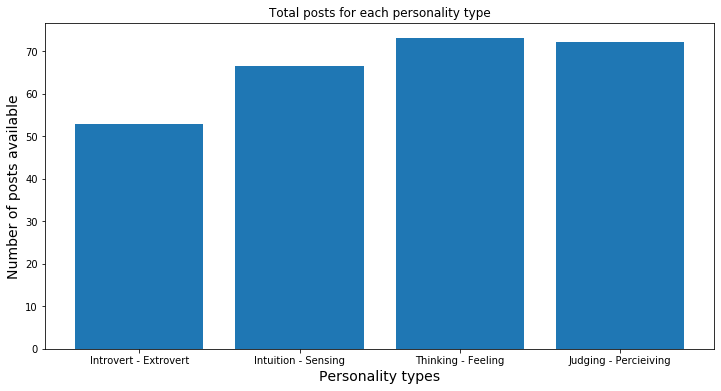

In [61]:
plt.figure(figsize = (12,6))

plt.bar(np.array(results.columns), height = results.loc['train'],)
plt.xlabel('Personality types', size = 14)
plt.ylabel('Number of posts available', size = 14)
plt.title('Total posts for each personality type')

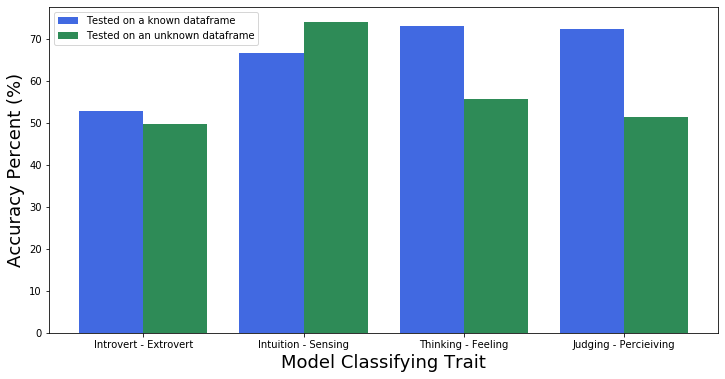

In [62]:
labels = np.array(results.columns)

training = results.loc['train']
ind = np.arange(4)
width = 0.4
fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, training, width, color='royalblue')

testing = results.loc['test']
rects2 = ax.bar(ind+width, testing, width, color='seagreen')

fig.set_size_inches(12, 6)
fig.savefig('Results.png', dpi=200)

ax.set_xlabel('Model Classifying Trait', size = 18)
ax.set_ylabel('Accuracy Percent (%)', size = 18)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(labels)
ax.legend((rects1[0], rects2[0]), ('Tested on a known dataframe', 'Tested on an unknown dataframe'))
plt.show()

# Testing the model

Predicting famous personalities personality type based on their social media post.


In [63]:
#Defining a functions that inputs the writings, tokenizes them and then predicts the output based on our earlier classifiers
def MBTI(input):
    tokenize = build_bag_of_words_features_filtered(input)
    ie = IntroExtro.classify(tokenize)
    Is = IntuitionSensing.classify(tokenize)
    tf = ThinkingFeeling.classify(tokenize)
    jp = JudgingPercieiving.classify(tokenize)
    
    mbt = ''
    
    if(ie == 'introvert'):
        mbt+='I'
    if(ie == 'extrovert'):
        mbt+='E'
    if(Is == 'Intuition'):
        mbt+='N'
    if(Is == 'Sensing'):
        mbt+='S'
    if(tf == 'Thinking'):
        mbt+='T'
    if(tf == 'Feeling'):
        mbt+='F'
    if(jp == 'Judging'):
        mbt+='J'
    if(jp == 'Percieving'):
        mbt+='P'
    return(mbt)

Building another functions that takes all the posts as input and outputs the graph showing percentage of each trait seen in each posts and sums up displaying your personality as the graph title

Note: The input should be an array of your posts


In [64]:
def tellmemyMBTI(input, name, traasits=[]):
    a = []
    trait1 = pd.DataFrame([0,0,0,0],['I','N','T','J'],['count'])
    trait2 = pd.DataFrame([0,0,0,0],['E','S','F','P'],['count'])
    for i in input:
        a += [MBTI(i)]
    for i in a:
        for j in ['I','N','T','J']:
            if(j in i):
                trait1.loc[j]+=1                
        for j in ['E','S','F','P']:
            if(j in i):
                trait2.loc[j]+=1 
    trait1 = trait1.T
    trait1 = trait1*100/len(input)
    trait2 = trait2.T
    trait2 = trait2*100/len(input)
    
    
    #Finding the personality
    YourTrait = ''
    for i,j in zip(trait1,trait2):
        temp = max(trait1[i][0],trait2[j][0])
        if(trait1[i][0]==temp):
            YourTrait += i  
        if(trait2[j][0]==temp):
            YourTrait += j
    traasits +=[YourTrait] 
    
    #Plotting
    
    labels = np.array(results.columns)

    intj = trait1.loc['count']
    ind = np.arange(4)
    width = 0.4
    fig = plt.figure()
    ax = fig.add_subplot(111)
    rects1 = ax.bar(ind, intj, width, color='royalblue')

    esfp = trait2.loc['count']
    rects2 = ax.bar(ind+width, esfp, width, color='seagreen')

    fig.set_size_inches(10, 7)
    
    

    ax.set_xlabel('Finding the MBTI Trait', size = 18)
    ax.set_ylabel('Trait Percent (%)', size = 18)
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(labels)
    ax.set_yticks(np.arange(0,105, step= 10))
    ax.set_title('Your Personality is '+YourTrait,size = 20)
    plt.grid(True)
    
    
    fig.savefig(name+'.png', dpi=200)
    
    plt.show()
    return(traasits)

Importing social media posts from a text file
I copied all my answer from their social media (i broke down the paragraphs as separate posts separated by |||)

Personality :Mr.Barack Obama

In [65]:
My_writings = open("BarackObama.txt")
my_writing = My_writings.readlines()
#my_writing

In [66]:
my_posts = my_writing[0].split('|||')
len(my_posts)
#my_posts

6

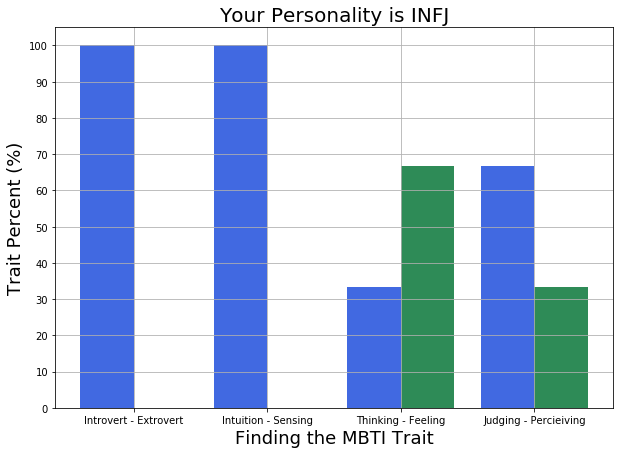

In [67]:
#predicting personality
trait=tellmemyMBTI(my_posts, 'Barack Obama')

Barack Obama's personality typpe is ENFJ.Our model predicts it as INFJ which is pretty good prediction according to 50% accuracy of our model.

Personality : Mrs. Michelle Obama

In [78]:
My_writings = open("michelleObama.txt","r",encoding='utf-8')#to remove encoding format errors
my_writing = My_writings.readlines()
#my_writing

In [69]:
my_posts = my_writing[0].split('|||')
len(my_posts)
#my_posts

7

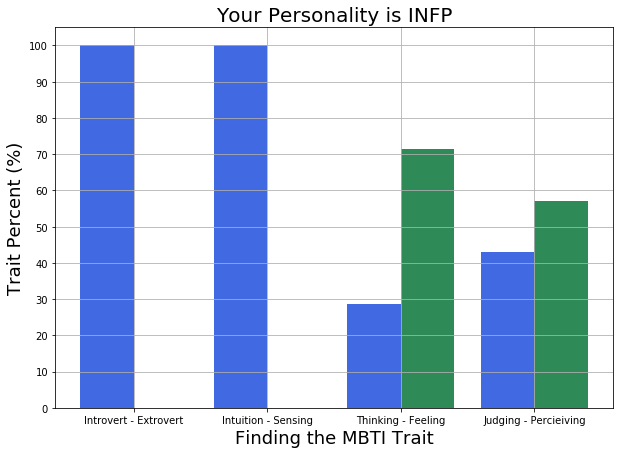

In [70]:
#predicting personality
trait=tellmemyMBTI(my_posts, 'Michelle Obama')

Michelle Obama's personality type is INTJ.My model predicts ist as INFP.

Personality :Mr. Rishabh Kaushal (Our Professor)

In [71]:
My_writings = open("TESTDATA.txt")
my_writing = My_writings.readlines()
#my_writing

In [72]:
my_posts = my_writing[0].split('|||')
len(my_posts)
#my_posts

10

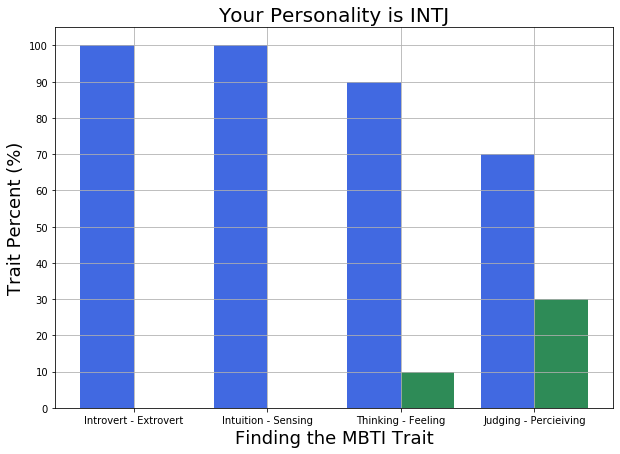

In [73]:
#predicting personality
trait=tellmemyMBTI(my_posts, 'TEST DATA')

# TEST DATA ABOVE

Test data personality type is INTJ according to our model.Test data is our Professor's(Rishabh sir).

Checking my friend's personality type based on his quora profile.

In [75]:
My_writings = open("ASHU.txt")
my_writing = My_writings.readlines()
#my_writing

In [76]:
my_posts = my_writing[0].split('|||')
len(my_posts)
#my_posts

13

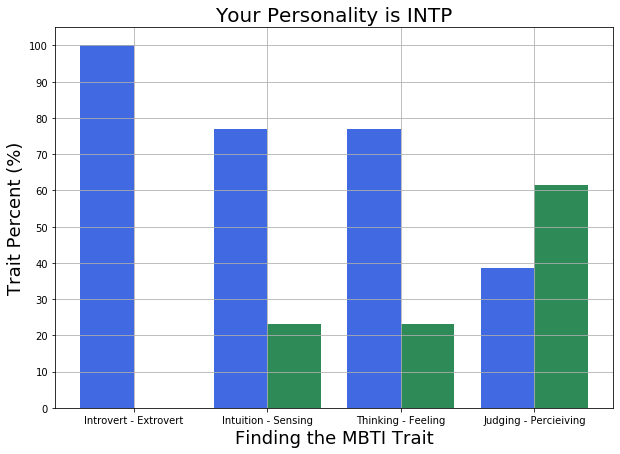

In [77]:
#predicting personality
trait=tellmemyMBTI(my_posts, 'ASHU')

My friend's Personality type according to 16personalities.com is ENFP . My model tells INTP as his type, which is a good prediction according to 50% accuracy of my model.Data taken from quora : https://www.quora.com/profile/Ashutosh-Trivedi-10?q=ashu

Checking my personality type

In [79]:
My_writings = open("BHAVANA.txt","r",encoding='utf-8')#to remove utf unicode error.
my_writing = My_writings.readlines()
#my_writing

In [80]:
my_posts = my_writing[0].split('|||')
len(my_posts)
#my_posts

9

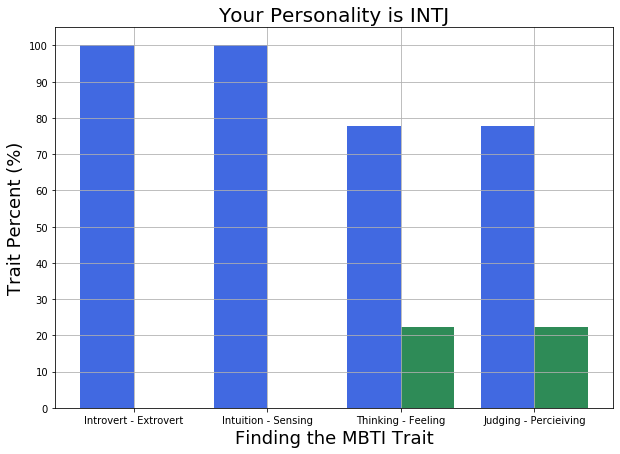

In [81]:
#predicting personality
trait=tellmemyMBTI(my_posts, 'BHAVANA')

My personality type is ISFJ. My model predicts it as INTJ.Data taken from Quora-https://www.quora.com/profile/Bhavana-Sinha/answers

There is slight difference between the personality predicted by the model and the personality predicted by 16personalities.com.This might be because 1)we have not scraped the profile but have copied few posts of the user into the test file.2)We are using Naiive Bayes classifier whose accuracy is 50%.
so according to the accuracy of the model,we are getting a good result.